In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
# plt.rc(usetex = True)
def poly_plot2(x_data,y_data,x0,x1,ax,c='b',deg=1,linestyle="-"):
    try:
        res=np.polyfit(pd.to_numeric(x_data),pd.to_numeric(y_data),deg=deg,cov=True)
    except:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    coeff=res[0]
    k_err=[]
    i2=0;
    for i in res[1]:
        k_err.append(np.sqrt(i[i2]))
        i2+=1
    

    
    y=[]
    x_arr=np.linspace(x0,x1,1000)
    n=len(coeff)-1
    for x in x_arr:
        y_buff=0;
        n_buff=n;
        for i in coeff:
            y_buff+=i*x**n_buff
            n_buff-=1
        y.append(y_buff)
    s='y='
    n=deg
    for k in coeff:
        s+='('+format(k,'.2e')+')'+f'$x^{n}$+'
        n-=1
        
    ax.plot(x_arr,y,c=c,label=s[:-1],linestyle=linestyle)
    return coeff,k_err

def poly_plot3(ax,data,x,y,c='b',limits=(0,0),deg=1,linestyle="-"):
    if limits==(0,0):
        coeffs=poly_plot2(data[x].array,data[y].array,data[x].min(),data[x].max(),ax,c,deg=deg,linestyle=linestyle)
    else:
        coeffs=poly_plot2(data[x].array,data[y].array,limits[0],limits[1],ax,c,deg=deg,linestyle=linestyle)
    return coeffs

def plot_line (ax,k=0,b=0,limits=(0,0),c='b',vert=False,x0=0,label=""):
    x1=limits[0]
    x2=limits[1]
    if vert:
        ax.plot([x0,x0],[x1,x2],c=c,label="x={}".format(x0)+label,linestyle="--")
        return
    ax.plot([x1,x2],[k*x1+b,k*x2+b],c=c,label=label)
    
def gausse(x,a,b,c):
    return a*np.exp( -(x-b)**2/(2*c**2) )

def gausse_fit(data,x,y,limits,p0):
    x0=limits[0]
    x1=limits[1]
    data2=data[ (data[x]>=x0)&(data[x]<=x1) ].copy()
    k,_=curve_fit(gausse, data2[x],data2[y],p0,maxfev=5000)
    return k[0],k[1],k[2]

In [7]:
data1=pd.read_csv("table1.csv")
data1

,I,Mirror
0,7.6,0.0
1,8.6,0.0
2,9.0,1.0
3,13.4,2.0
4,14.3,24.0
5,14.5,60.0
6,14.7,94.0
7,14.9,132.0
8,15.1,183.0
9,15.3,252.0


In [8]:
data1["Power"]=data1.I*144
data1

,I,Mirror,Power
0,7.6,0.0,1094.4
1,8.6,0.0,1238.4
2,9.0,1.0,1296.0
3,13.4,2.0,1929.6
4,14.3,24.0,2059.2
5,14.5,60.0,2088.0
6,14.7,94.0,2116.8
7,14.9,132.0,2145.6
8,15.1,183.0,2174.4
9,15.3,252.0,2203.2


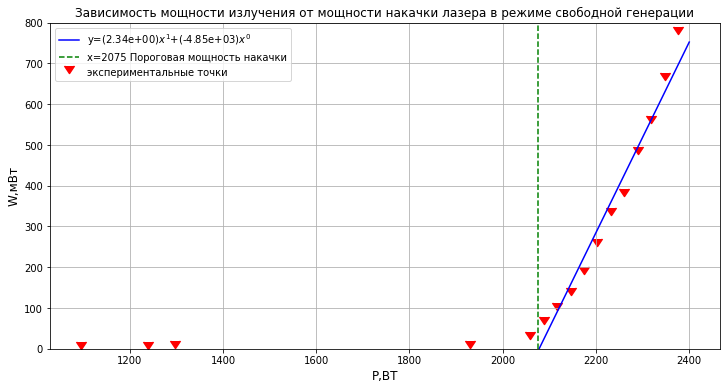

In [9]:
fig,ax=plt.subplots(figsize=(12,6))
data1.plot(ax=ax,kind="scatter",x="Power",y="Mirror",marker=7,s=100,c='r',label='экспериментальные точки')
poly_plot3(ax=ax,data=data1[4:],x="Power",y="Mirror",limits=(2000,2400),linestyle="-")
plot_line(ax=ax,vert=True,limits=(0,800),x0=2075,c='g',label=" Пороговая мощность накачки")


plt.ylim(0,800)
# plt.xlim(2000)
plt.title("Зависимость мощности излучения от мощности накачки лазера в режиме свободной генерации",size=12)
plt.xlabel("P,ВТ",size=12)
plt.ylabel("W,мВт",size=12)
plt.legend()
plt.grid()

fig.savefig("graph1.1.pdf")

In [10]:
data2=pd.read_csv("table2.csv")
data2["Power"]=data2.I*147
data2

,I,Card,Power
0,7.6,0.0,1117.2
1,8.6,0.0,1264.2
2,8.9,1.0,1308.3
3,13.4,2.0,1969.8
4,14.2,38.0,2087.4
5,14.5,85.5,2131.5
6,14.8,143.0,2175.6
7,15.1,220.0,2219.7
8,15.4,302.5,2263.8
9,15.7,400.0,2307.9


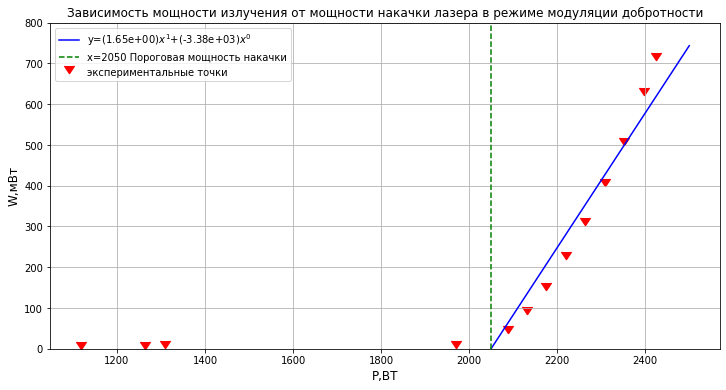

In [11]:
fig,ax=plt.subplots(figsize=(12,6))
data2.plot(ax=ax,kind="scatter",x="Power",y="Card",marker=7,s=100,c='r',label='экспериментальные точки')
poly_plot3(ax=ax,data=data2[3:],x="Power",y="Card",limits=(2000,2500),linestyle="-")
plot_line(ax=ax,vert=True,limits=(0,800),x0=2050,c='g',label=" Пороговая мощность накачки")


plt.ylim(0,800)
# plt.xlim(2000,2450)
plt.title("Зависимость мощности излучения от мощности накачки лазера в режиме модуляции добротности",size=12)
plt.xlabel("P,ВТ",size=12)
plt.ylabel("W,мВт",size=12)
plt.legend()
plt.grid()

fig.savefig("graph2.1.pdf")

In [12]:
data3=pd.read_csv("table3.csv")
data3

,t,I
0,5.0,14.3
1,6.0,14.6
2,4.0,14.9
3,4.5,15.2
4,4.0,15.5
5,4.5,15.8
6,4.5,16.1
7,4.0,16.3
8,4.0,16.5


In [16]:
data3["T"]=data3.t*0.1
data3["P"]=data3.I*169
data3["Ln"]=np.log(data3["T"])

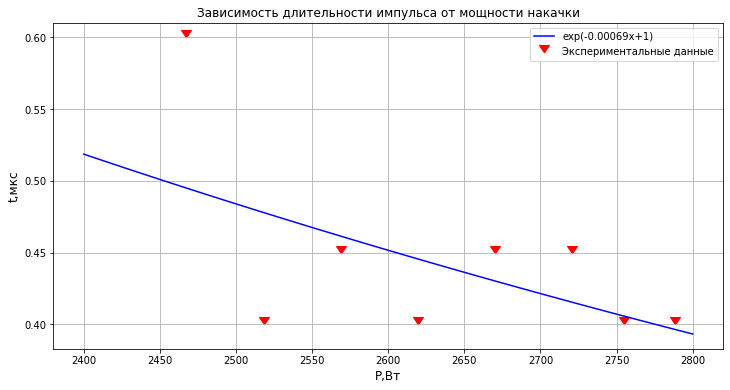

In [56]:
fig,ax=plt.subplots(figsize=(12,6))
data3[1:].plot(ax=ax,kind="scatter",x="P",y="T",marker=7,s=100,label="Экспериментальные данные",c='r')
# coeffs=poly_plot3(ax=ax,data=data3[1:],x="P",y="Ln")
# coeffs=poly_plot3(ax=ax,data=data3[1:],x="P",y="T",deg=3)
k=coeffs[0][0]
b=coeffs[0][1]
ax.plot(np.linspace(2400,2800,100),np.exp(k*np.linspace(2400,2800,100)+b),c='b',label=r"exp({}x+{})".format(-6.9e-4,1))
plt.xlabel("P,Вт",size=12)
plt.ylabel("t,мкс",size=12)
plt.title("Зависимость длительности импульса от мощности накачки",size=12)
plt.grid()
plt.legend()
fig.savefig("graph3.pdf")